### Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
df = pd.read_feather(r"C:\Users\Stugots\Desktop\Bootcamp Stuff\Achievement 6 Solo Project\Data\Prepared Data\rider_ACSdemos.feather")

In [10]:
pd.set_option('display.max_rows', None)

In [14]:
df.head()

,MonthDT,Borough,ridership - Fair Fare,ridership - Full Fare,ridership - Other,ridership - Seniors & Disability,ridership - Student,ridership_Metrocard - Unlimited 30-Day,ridership_Metrocard - Unlimited 7-Day,transfer - Fair Fare,...,"15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more",Median household income (dollars),Mean household income (dollars)
0,01-2023,Bronx,455982.0,3374015.0,382456.0,215604.0,610250.0,675583.0,1018097.0,36609.0,...,"56,604","47,728","62,657","88,836","55,527","58,439","27,952","25,995","46,838","67,778"
1,01-2023,Brooklyn,784565.0,12450859.0,991470.0,747122.0,1487269.0,2250614.0,1899368.0,49188.0,...,"71,940","67,165","95,843","139,476","112,041","153,992","93,854","166,849","76,912","119,171"
2,01-2023,Manhattan,1216680.0,32841413.0,2099078.0,1724836.0,1619156.0,4734871.0,4360672.0,38804.0,...,"47,497","42,459","48,770","82,992","68,309","98,515","68,826","230,381","101,078","188,118"
3,01-2023,Queens,406791.0,7820247.0,588734.0,541866.0,892048.0,1653688.0,1770402.0,47193.0,...,"53,344","58,479","80,195","124,894","104,484","153,816","89,465","114,609","81,929","110,305"
4,01-2023,Staten Island,4919.0,109014.0,12882.0,8909.0,11095.0,11878.0,8685.0,1462.0,...,"10,048","9,570","15,343","17,478","17,599","32,517","20,906","28,877","95,543","118,855"


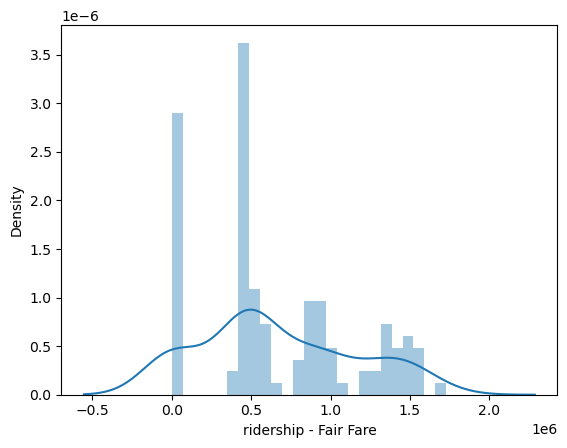

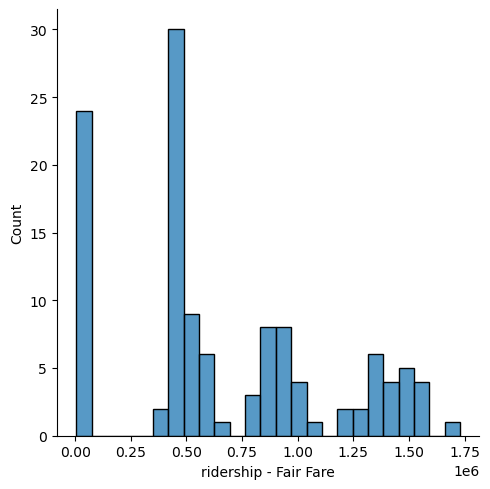

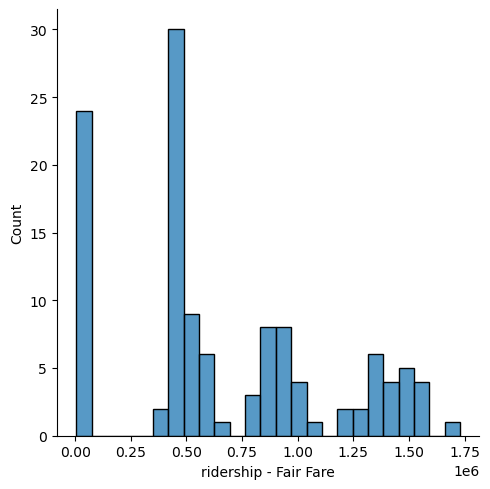

In [20]:
sns.displot(df['ridership - Fair Fare'], bins=25) # Shows extreme values
matplotlib.pyplot.show()
# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

### Hypothesis

Labor Force Size and Ridership Hypothesis: Boroughs with larger labor force populations will exhibit higher average subway ridership.

### Data Prep For Regression Analysis

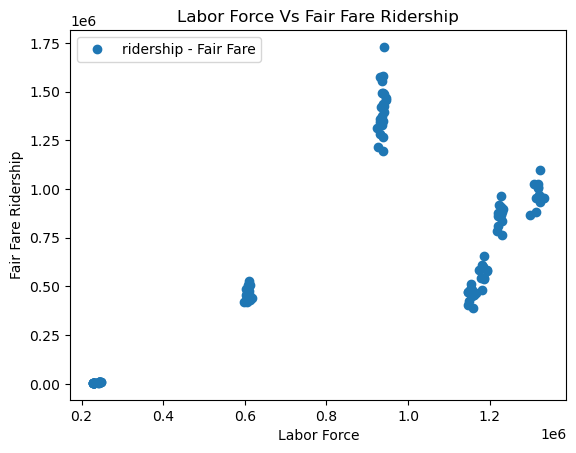

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Labor Force', y='ridership - Fair Fare',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Labor Force Vs Fair Fare Ridership')  
plt.xlabel('Labor Force')  
plt.ylabel('Fair Fare Ridership')  
plt.show()

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df['Labor Force'].values.reshape(-1,1)
y = df['ridership - Fair Fare'].values.reshape(-1,1)

In [41]:
x

array([[ 607200.],
       [1217200.],
       [ 927200.],
       [1147100.],
       [ 228500.],
       [ 612800.],
       [1230500.],
       [ 938400.],
       [1159500.],
       [ 230700.],
       [ 612500.],
       [1232900.],
       [ 941100.],
       [1161700.],
       [ 231000.],
       [ 605600.],
       [1219600.],
       [ 930700.],
       [1149500.],
       [ 229400.],
       [ 607400.],
       [1223800.],
       [ 934500.],
       [1152900.],
       [ 229800.],
       [ 608600.],
       [1227000.],
       [ 936800.],
       [1155400.],
       [ 230100.],
       [ 610000.],
       [1230000.],
       [ 938300.],
       [1157300.],
       [ 230900.],
       [ 609900.],
       [1230400.],
       [ 938300.],
       [1156500.],
       [ 230800.],
       [ 602600.],
       [1219400.],
       [ 931200.],
       [1146800.],
       [ 228100.],
       [ 607500.],
       [1228200.],
       [ 937500.],
       [1154400.],
       [ 229200.],
       [ 606700.],
       [1227500.],
       [ 938

In [39]:
y

array([[ 455982.],
       [ 784565.],
       [1216680.],
       [ 406791.],
       [   4919.],
       [ 432089.],
       [ 764492.],
       [1192577.],
       [ 387525.],
       [   4499.],
       [ 508500.],
       [ 895578.],
       [1392676.],
       [ 457599.],
       [   5398.],
       [ 448884.],
       [ 807745.],
       [1281049.],
       [ 423576.],
       [   5002.],
       [ 506568.],
       [ 916037.],
       [1420347.],
       [ 479021.],
       [   5912.],
       [ 471338.],
       [ 866441.],
       [1328224.],
       [ 457476.],
       [   5701.],
       [ 432844.],
       [ 834011.],
       [1264253.],
       [ 449947.],
       [   5480.],
       [ 461478.],
       [ 881647.],
       [1347510.],
       [ 481963.],
       [   6049.],
       [ 455694.],
       [ 862968.],
       [1342901.],
       [ 470967.],
       [   5671.],
       [ 491525.],
       [ 961804.],
       [1493596.],
       [ 514571.],
       [   6617.],
       [ 461000.],
       [ 909848.],
       [1434

In [43]:
# Split data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Regression Analysis

In [46]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [50]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [54]:
# Predict the values of y using X.

y_predicted = regression.predict(x_test)

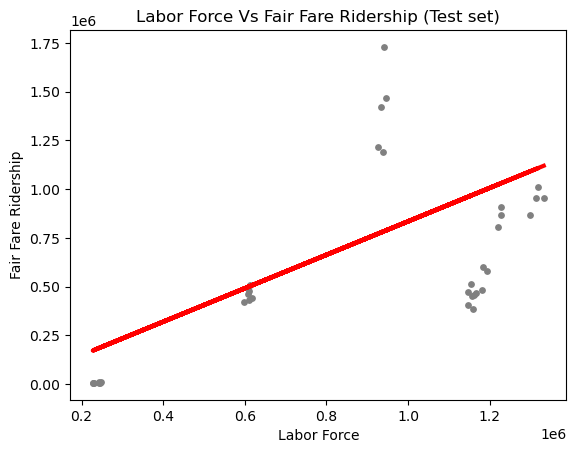

In [56]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Labor Force Vs Fair Fare Ridership (Test set)')
plot_test.xlabel('Labor Force')
plot_test.ylabel('Fair Fare Ridership')
plot_test.show()

The regression line does not fit the test set very well.  I believe the issue is that the separate boroughs each have such varied ridership month to month with virtually stagnant labor forces which is going to skew results. 

In [58]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [60]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.85775739]]
Mean squared error:  139666826324.28528
R2 score:  0.2724069718382569


In [62]:
y_predicted

array([[ 966849.60335629],
       [ 188434.7750663 ],
       [ 505890.78382677],
       [ 971224.16602767],
       [ 788350.29121618],
       [ 778228.75405495],
       [ 781574.00786247],
       [ 502030.87558732],
       [ 497742.08865459],
       [ 186805.03603187],
       [ 969337.09977727],
       [ 497055.88274535],
       [ 771967.12513316],
       [ 489936.49643702],
       [ 185861.50290667],
       [ 185861.50290667],
       [ 499886.48212095],
       [ 960330.64721854],
       [1108036.46918167],
       [1103661.90651028],
       [ 976456.4860856 ],
       [ 171880.05750598],
       [1022775.38495905],
       [ 173767.12375638],
       [ 499114.50047306],
       [ 973111.23227807],
       [ 172995.14210849],
       [ 999873.26273829],
       [1029122.78961949],
       [ 988893.9681905 ],
       [1029551.66831276],
       [ 991295.68887283],
       [ 783889.95280615],
       [1091052.87292807],
       [ 960587.9744345 ],
       [1119616.19390003]])

In [64]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,514571.0,9.668496e+05
1,8642.0,1.884348e+05
2,439848.0,5.058908e+05
3,387525.0,9.712242e+05
4,1464991.0,7.883503e+05
5,1420347.0,7.782288e+05
6,1192577.0,7.815740e+05
7,508500.0,5.020309e+05
8,491525.0,4.977421e+05
9,7634.0,1.868050e+05


### Compare Regression to Training Dataset

In [67]:
# Predict.

y_predicted_train = regression.predict(x_train) # This is predicting X_train!

In [69]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.85775739]]
Mean squared error:  139666826324.28528
R2 score:  0.2724069718382569


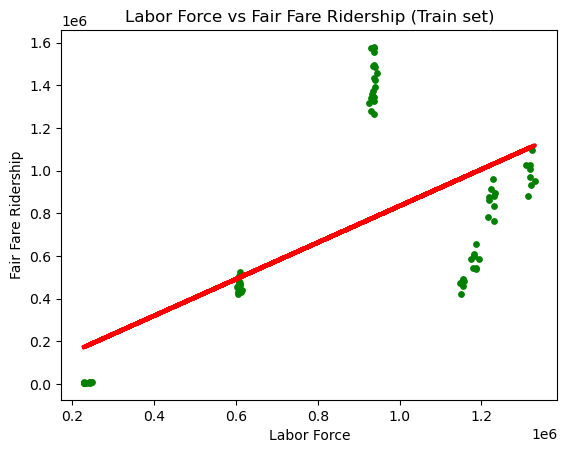

In [71]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Labor Force vs Fair Fare Ridership (Train set)')
plot_test.xlabel('Labor Force')
plot_test.ylabel('Fair Fare Ridership')
plot_test.show()

In terms of the MSE, even given the large scale of the values we are analyzing, especially in regards to ridership in manhattan, this is still an extremely large value showing that on average this regression is very far off. 

The R2 score of .2724 means that this model is a very weak fit for this data. 

I believe the real issue here is the major difference between the boroughs specifically the labor force to ridership ratio within each borough. If I look at each borough separately there appears to be positive correlation, so I believe if I were to run these regression analyses separately for each borough I would actually be able to find a regression line that would be quite accurate.   